In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
plt.rcParams['figure.figsize'] = (10,7)
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [2]:
data_features = pd.read_csv('/content/drive/MyDrive/Projet_s1/training_set_features.csv')
data_features

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [3]:
data_labels = pd.read_csv('/content/drive/MyDrive/Projet_s1/training_set_labels.csv')
data_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [4]:
data_test = pd.read_csv('/content/drive/MyDrive/Projet_s1/test_set_features.csv')
data_test

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [5]:
data_labels['seasonal_vaccine'].unique()

array([0, 1])

In [6]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

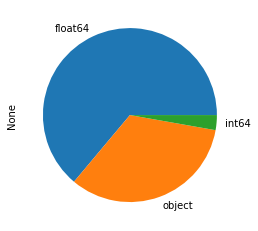

In [7]:
data_features.dtypes.value_counts().plot.pie()

In [8]:
data_features.isna().sum().sort_values(ascending = False)

employment_occupation          13470
employment_industry            13330
health_insurance               12274
income_poverty                  4423
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2042
employment_status               1463
marital_status                  1408
education                       1407
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
opinion_seas_sick_from_vacc      537
opinion_seas_risk                514
opinion_seas_vacc_effective      462
opinion_h1n1_sick_from_vacc      395
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
household_children               249
household_adults                 249
behavioral_avoidance             208
behavioral_touch_face            128
h1n1_knowledge                   116
h1n1_concern                      92
behavioral_large_gatherings       87
behavioral_outside_home           82
b

In [9]:
(data_features.isna().sum()/data_features.shape[0]).sort_values(ascending = False)

employment_occupation          0.504362
employment_industry            0.499120
health_insurance               0.459580
income_poverty                 0.165612
doctor_recc_h1n1               0.080878
doctor_recc_seasonal           0.080878
rent_or_own                    0.076459
employment_status              0.054780
marital_status                 0.052720
education                      0.052683
chronic_med_condition          0.036358
child_under_6_months           0.030704
health_worker                  0.030104
opinion_seas_sick_from_vacc    0.020107
opinion_seas_risk              0.019246
opinion_seas_vacc_effective    0.017299
opinion_h1n1_sick_from_vacc    0.014790
opinion_h1n1_vacc_effective    0.014640
opinion_h1n1_risk              0.014528
household_children             0.009323
household_adults               0.009323
behavioral_avoidance           0.007788
behavioral_touch_face          0.004793
h1n1_knowledge                 0.004343
h1n1_concern                   0.003445


La première question que je me suis posé est de savoir combien  combien d'individu ont fait le vaccin h1n1 ou le vaccin contre la grippe saisonnière ?

In [10]:
# race, respondent_id , education
merge_data = pd.merge(data_features, data_labels, on ='respondent_id')
merge_data.head()
data = merge_data
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


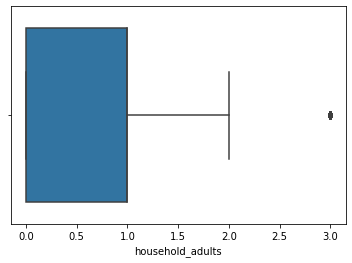

In [11]:
sns.boxplot(x = 'household_adults', data=data)

In [12]:
list(data_features)

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation']

In [13]:
data_features = data_features.astype(object)

In [14]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   respondent_id                26707 non-null  object
 1   h1n1_concern                 26615 non-null  object
 2   h1n1_knowledge               26591 non-null  object
 3   behavioral_antiviral_meds    26636 non-null  object
 4   behavioral_avoidance         26499 non-null  object
 5   behavioral_face_mask         26688 non-null  object
 6   behavioral_wash_hands        26665 non-null  object
 7   behavioral_large_gatherings  26620 non-null  object
 8   behavioral_outside_home      26625 non-null  object
 9   behavioral_touch_face        26579 non-null  object
 10  doctor_recc_h1n1             24547 non-null  object
 11  doctor_recc_seasonal         24547 non-null  object
 12  chronic_med_condition        25736 non-null  object
 13  child_under_6_months         25

In [15]:
data_features['household_adults'] = data_features['household_adults'].astype('float')

In [16]:
data_features['household_children'] = data_features['household_children'].astype('float')

In [17]:
data_features['h1n1_concern'].value_counts(normalize=True)

2.0    0.397332
1.0    0.306331
3.0    0.172497
0.0    0.123840
Name: h1n1_concern, dtype: float64

In [18]:
data_features.shape

(26707, 36)

In [19]:
data_features.dtypes.value_counts()

object     34
float64     2
dtype: int64

Variable quantitative:


1.   household_adults
2.   household_children







In [20]:
#data_cat= data.drop(['household_adults','household_children','employment_occupation', 'employment_industry','health_insurance'], axis=1)

In [21]:
#data_cat.isna().sum().sort_values(ascending = False)

# Exploration de données

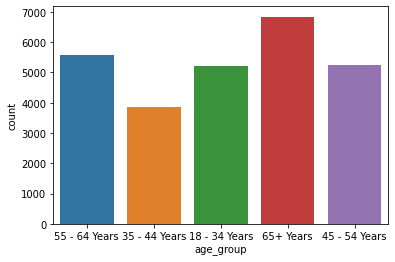

In [22]:
sns.countplot(x = 'age_group', data = data_features)

In [23]:
data['age_group'].value_counts(normalize=True)

65+ Years        0.256225
55 - 64 Years    0.208297
45 - 54 Years    0.196128
18 - 34 Years    0.195267
35 - 44 Years    0.144082
Name: age_group, dtype: float64

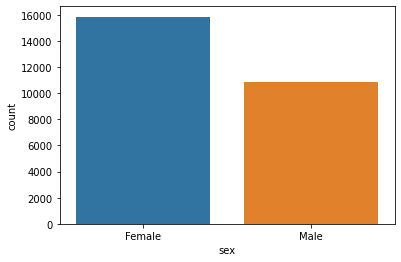

In [24]:
sns.countplot(x = 'sex', data = data_features)

In [25]:
data_features['sex'].value_counts(normalize = True)

Female    0.593777
Male      0.406223
Name: sex, dtype: float64

In [26]:
data['sex'].value_counts(normalize=True)

Female    0.593777
Male      0.406223
Name: sex, dtype: float64

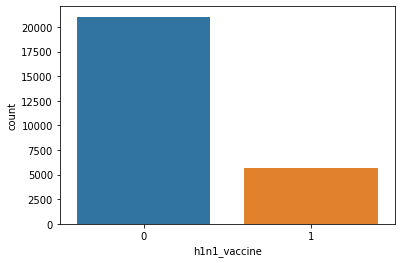

In [27]:
sns.countplot(x = 'h1n1_vaccine', data = data_labels)

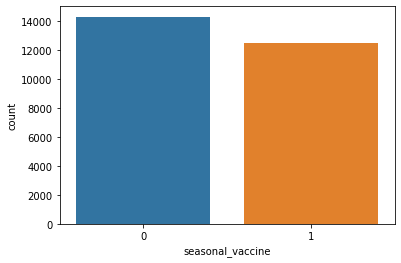

In [28]:
sns.countplot(x = 'seasonal_vaccine', data = data_labels)

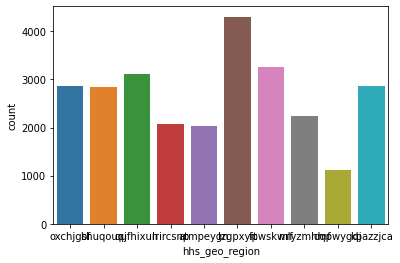

In [29]:
sns.countplot(x ='hhs_geo_region', data = data_features )

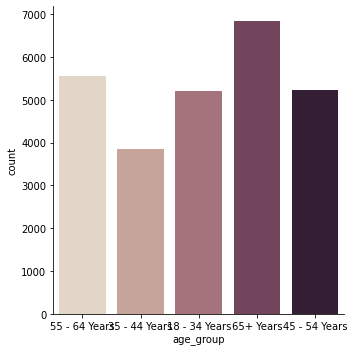

In [30]:
sns.catplot(x="age_group", kind="count", palette="ch:.25", data=data)

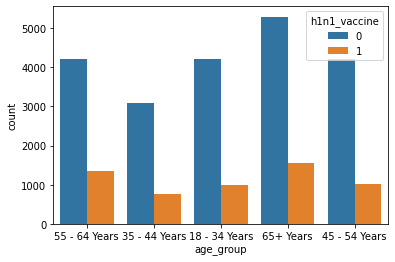

In [31]:
sns.countplot(x='age_group', hue='h1n1_vaccine', data=data)

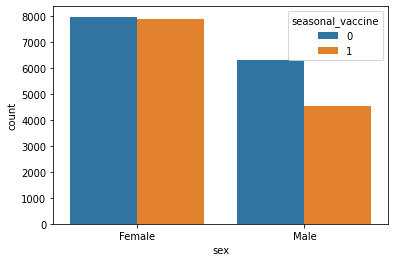

In [32]:
sns.countplot(x='sex', hue='seasonal_vaccine', data=data)


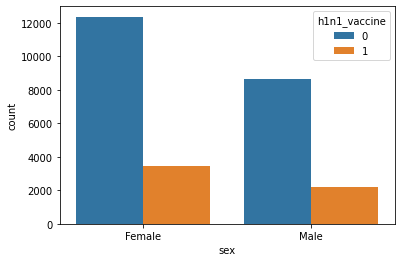

In [33]:
sns.countplot(x='sex', hue='h1n1_vaccine', data=data)

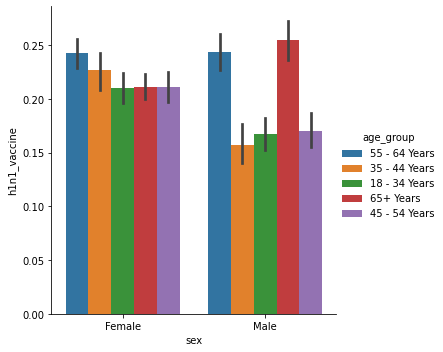

In [34]:
sns.catplot(x="sex", y="h1n1_vaccine", hue="age_group", kind="bar", data=data)

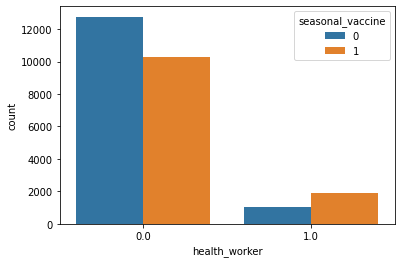

In [35]:
sns.countplot(x='health_worker', hue='seasonal_vaccine', data=data)

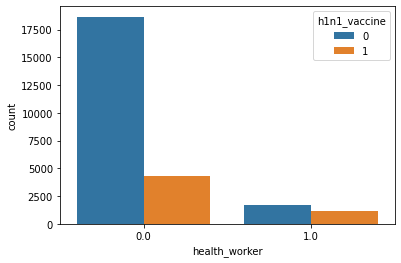

In [36]:
sns.countplot(x='health_worker', hue='h1n1_vaccine', data=data)

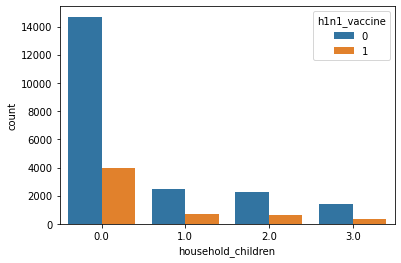

In [37]:
sns.countplot(x='household_children', hue='h1n1_vaccine', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


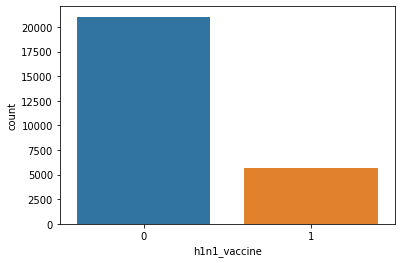

In [38]:
sns.countplot(data_labels['h1n1_vaccine'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


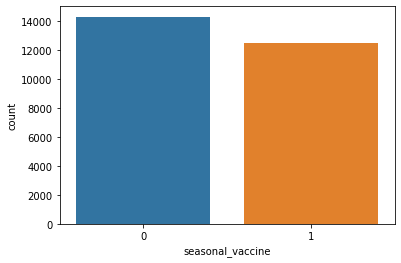

In [39]:
sns.countplot(data_labels['seasonal_vaccine'])

j'ai aussi la distribution de mes deux variables cibles en fonction du sexe.

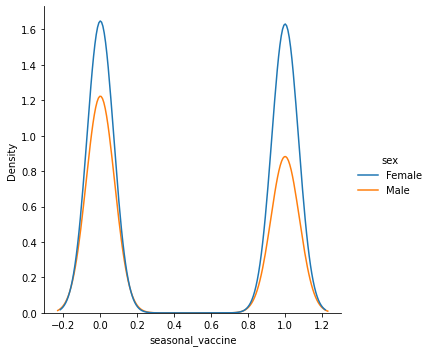

In [40]:
selected_vaccin ='seasonal_vaccine'
selected_features = [selected_vaccin, 'sex']
sns.displot(data = data[selected_features], x = selected_vaccin, hue='sex', kind = 'kde')
# Pour voir la distribution des valeus en fonction du sex

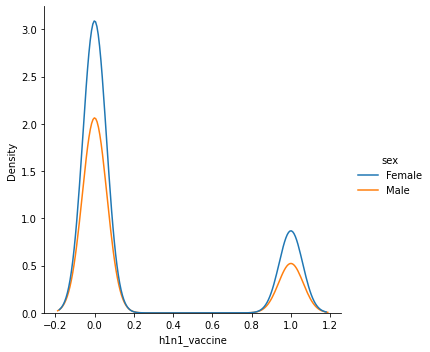

In [41]:
selected_vaccin = 'h1n1_vaccine'
selected_features = [selected_vaccin, 'sex']
sns.displot(data = data[selected_features], x = selected_vaccin, hue='sex', kind = 'kde')

On constate que la proportion des femme est plus élévées que ça soit sur la grippe h1n1 que sur la grippe saisonière.

In [42]:
selected_vaccin = 'seasonal_vaccine'
selected_features = [selected_vaccin, 'chronic_med_condition']
sns.displot(data_labels = data_labels[selected_features], x = selected_vaccin, hue='chronic_med_condition', kind = 'kde')
# ce graphe montre la distribution de de la variable seaisonal_vaccine en fontion de chronic_med_condition

KeyError: ignored

In [ ]:
grid = sns.FacetGrid(data, col='health_worker', size = 4, aspect=2)
grid.map(sns.countplot, 'seasonal_vaccine')

In [ ]:
grid = sns.FacetGrid(data, col='health_worker', size = 4, aspect=2)
grid.map(sns.countplot, 'h1n1_vaccine')

In [ ]:
grid = sns.FacetGrid(data, col='chronic_med_condition', size = 4, aspect=2)
grid.map(sns.countplot, 'seasonal_vaccine')

Sans surprise, la distribution des vaccins  n'est pas du tout uniforme, on constate, une legère superiorité des femme sur les deux variables. 

Cependant, près de 39 000 médailles ont été attribuées, ce qui signifie que si vous appartenez à ce top 20% des athlètes qui remportent une médaille, vous êtes censé en gagner plus d’une en moyenne.

In [ ]:
data.groupby('household_children').median()

In [ ]:
data.info()

In [ ]:
pd.crosstab(data_labels['h1n1_vaccine'], data_labels['seasonal_vaccine'], normalize=True)

  Aprèscette visualisation on peut dire que environ 50% des individus qui ont refusé. Le vaccin h1n1 on également refusé le vaccin contre la grippe saisonnière environ 29% des individus qui ont refusé le vaccin contre la gripê A h1n1_vaccin  ont fait le vaccin contre la grippe saisonnière seasonal_vaccine seulement 3.6% ont refusé le vaccin contre la grippe saisonnière seasonal_vaccine et ont fait le vaccin contre la gripê A h1n1_vaccin en fin 17.5% des individus ont fait à la fois les deux vaccins.

In [ ]:
plt.figure()
sns.heatmap(pd.crosstab(data_labels['h1n1_vaccine'], data_labels['seasonal_vaccine']), annot = True, fmt='d')

In [ ]:
pd.crosstab(data['seasonal_vaccine'], data['age_group'], normalize=True)

In [ ]:
sns.heatmap(pd.crosstab(data['h1n1_vaccine'], data['age_group']), annot = True, fmt='d')

In [ ]:
pd.crosstab(data['seasonal_vaccine'], data['sex'], normalize=True)

In [ ]:
plt.figure()
sns.heatmap(pd.crosstab(data['seasonal_vaccine'], data['sex']), annot = True, fmt='d')

In [ ]:
data['sex'].value_counts(normalize=True)



Sans surprise, la distribution des vaccins n'est pas du tout uniforme, on constate, une legère superiorité des femme sur les deux variables.
Cependant, près de 39 000 médailles ont été attribuées, ce qui signifie que si vous appartenez à ce top 20% des athlètes qui remportent une médaille, vous êtes censé en gagner plus d’une en moyenne.

In [ ]:
pd.crosstab(data['h1n1_vaccine'], data['sex'], normalize=True)

In [ ]:
plt.figure()
sns.heatmap(pd.crosstab(data['h1n1_vaccine'], data['sex']), annot = True, fmt='d')

In [ ]:
plt.figure()
sns.heatmap(pd.crosstab(data['doctor_recc_seasonal'], data['seasonal_vaccine']), annot = True, fmt='d')

In [ ]:
pd.crosstab(data['doctor_recc_seasonal'], data['seasonal_vaccine'], normalize=True)

In [ ]:
pd.crosstab(data['doctor_recc_h1n1'], data['h1n1_vaccine'])


# Gestion des valeurs manquantes

In [ ]:
data_features.isna().sum().sort_values(ascending = False)

In [ ]:
(data_features.isna().sum()/data_features.shape[0]).sort_values(ascending = False)

In [ ]:
#matrice_corr = df_num.corr().round(1)
#sns.heatmap(data = matrice_corr, annot= True)

Pour les variables categorielles les valeurs manquantes seront remplacées par le mode de la variable concernée car la moyenne est souvent plus infliencée par les valeurs aberrantes que la médiane

In [ ]:
data_num = data_features[['household_adults', 'household_children']]


In [ ]:
data_num.fillna(value={"household_children":  data_num['household_children'].median()}, inplace = True )

In [ ]:
data_features = data_features.drop(['household_adults','household_children','health_insurance',
                                    'employment_occupation', 'employment_industry'],axis=1)

In [ ]:
data_features = data_features.apply(lambda col:col.fillna(col.value_counts().index[0]))

In [ ]:
data_features.isna().sum().any()

In [ ]:
data_num.fillna(value={"household_adults":  data_num['household_adults'].median()}, inplace = True )
#J'ai remplacé les valeurs manquantes par la mediane de chaque variables car la moyenne est souvent influencé par les valeur 
#aberrantes
# je verifie avec l'écart type pour voir avant de valider

In [ ]:
data_num.isna().sum().any()

In [ ]:
#Encodage de variables categorielles 
#remplacer les valeurs catégoriques par des valeurs numériques
# le remplacement est fait de sorte que la valeur la plus repetée prend la valeur 1 le second 0
le=LabelEncoder()
for i in data_features:
    data_features[i]=le.fit_transform(data_features[i])

In [ ]:
data_features = pd.concat([data_features, data_num], axis = 1)
#data_f.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis = 1)

In [ ]:
data_features.shape

# Développement des modèles

In [ ]:
X = data_features
X.drop('respondent_id',axis=1, inplace=True)


In [ ]:
X.shape

In [ ]:
Y['h1n1_vaccine']

In [ ]:
Y = data_labels
Y.drop('respondent_id', axis=1, inplace=True)

In [ ]:
Y_1 = Y.drop(['seasonal_vaccine'], axis=1)

In [ ]:
Y_2 = Y.drop('h1n1_vaccine', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_1, x_test_1,y_train_1, y_test_1 = train_test_split(X,Y_1, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random1 = RandomForestClassifier()
random1.fit(x_train_1, y_train_1)
random1.predict(x_test_1)
#model_1.score(x_train, y_train)
random1.score(x_test_1, y_test_1)
#print(np.sum(y_pred_1 == y_test_1)/x_test_1.shape[0])
print ("Score Train -->", round(random1.score(x_test_1, y_test_1) *100,2), " %")

In [ ]:
random1.fit(data_test,data_labels)
radom1.predict(data_test)

In [ ]:
var_imp = pd.Series(model_1.feature_importances_, index = x_train_1.columns).sort_values(ascending=False)
var_imp

In [ ]:
sns.barplot(x = var_imp, y = var_imp.index)

In [ ]:
#Y=pd.DataFrame({"Y":Y})
#Y.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=123) 
clf1.fit(x_train_1,y_train_1)
clf1.score(x_test_1, y_test_1)
clf1.predict(x_test_1)
print ("Score Train -->", round(clf1.score(x_test_1, y_test_1) *100,2), " %")
#clf1.predict_log_proba(x_test_1[:10])

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
booster1 = XGBClassifier()
booster1.fit(x_train_1, y_train_1)
booster1.predict(x_train_1)
print ("Score Train -->", round(booster1.score(x_test_1, y_test_1) *100,2), " %")
booster1.predict_proba(x_test_1[:10])

In [ ]:
var_impx = pd.Series(booster.feature_importances_, index = x_train_1.columns).sort_values(ascending=False)
var_impx

In [ ]:
sns.barplot(x = var_impx, y = var_impx.index)

# Deuxième variables cible: seasonal_vaccine

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=20)
neigh1.fit(x_train_1, y_train_1)
#neigh_pred = neigh.predict(x_test_2)
print(neigh1.predict(x_test_1))
neigh1.score(x_test_1, y_test_1)
neigh1.predict_proba(x_test_1)
print ("Score Train -->", round(neigh1.score(x_test_1, y_test_1) *100,2), " %")
# je constacte que plus le nombre de voisins est élevé plus le score est élevé

In [ ]:
def evalution_model(model,features,labels):
  prediction = model.predict(features)
  score = accuracy_score(y_test,prediction)
  print('score global du modèle :', round(score,3))

In [ ]:
models = [ booster1,clf1, random1]
for model in models:
  print('modèle' + str(model))
  evalution_model(model, x_test_1, y_test_1)
  print('-'*80)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_2, x_test_2,y_train_2, y_test_2 = train_test_split(X,Y_2, test_size=0.3, random_state=42)

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
booster = XGBClassifier()
booster.fit(x_train_2, y_train_2)
p_booster = booster.predict(x_train_2)
print ("Score Train -->", round(booster.score(x_train_2, y_train_2) *100,2), " %")

# L'agorithme de la regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=123) 
clf.fit(x_train_2,y_train_2)
clf.score(x_test_2, y_test_2)
clf.score(x_test_2, y_test_2)
print ("Score Train -->", round(clf.score(x_test_2, y_test_2) *100,2), " %")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier()
model_2.fit(x_train_2, y_train_2)
y_pred_2 = model_2.predict(x_test_2)
#model_1.score(x_train, y_train)
model_2.score(x_test_2, y_test_2)
#print(np.sum(y_pred_1 == y_test_1)/x_test_1.shape[0])
print ("Score Train -->", round(model_2.score(x_test_2, y_test_2) *100,2), " %")

In [ ]:
var_imp = pd.Series(rf.feature_importances_, index = x_train_sup.columns).sort_values(ascending=False)
var_imp

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train_2, y_train_2)
#neigh_pred = neigh.predict(x_test_2)
print(neigh.predict(x_test_2))
neigh.score(x_test_2, y_test_2)
neigh.predict_proba(x_test_2)
print ("Score Train -->", round(neigh.score(x_test_2, y_test_2) *100,2), " %")

# je constacte que plus le nombre de voisins est élevé plus le score est élevé

In [ ]:
def evalution_model(model,features,labels):
  prediction = model.predict(features)
  score = accuracy_score(y_test,prediction)
  print('score global du modèle :', round(score,3))

In [ ]:
models = [lr_cv.best_estimator_, RF_cv.best_estimator_]
for model in models:
  print('modèle' + str(model))
  evalution_model(model, x_val, y_val)
  print('-'*80)

# Aeliaration des modèles

Je constate qu'il y a un désequilibre de classe. 79% pour ceux qui n'ont pas accepté  et 21%  pour ceux qui ont accepté le vaccin, pour réequlibrer ce desequilibrer j'ai utilisé le sur_échantillonnage(la plus petite classe à la hauteur de la plus grande) avec la fonction resample de sklearn

In [ ]:
y_train_1.value_counts(normalize=True)

In [ ]:
y_test_1.value_counts(normalize=True)

In [ ]:
y_test_2.value_counts(normalize=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_11 = RandomForestClassifier()
model_11.fit(x_train1_sup, y_train1_sup)
y_pred_11 = model_11.predict(x_test_1)
#model_1.score(x_train, y_train)
#model_11.score(x_test_1, y_test_1)
#print(np.sum(y_pred_1 == y_test_1)/x_test_1.shape[0])
print ("Score Train -->", round(model_11.score(x_test_1, y_test_1) *100,2), " %")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh11 = KNeighborsClassifier(n_neighbors=20)
neigh11.fit(x_train1_sup, y_train1_sup)
#neigh_pred = neigh.predict(x_test_2)
print(neigh11.predict(x_test_1))
neigh11.score(x_test_1, y_test_1)
neigh11.predict_proba(x_test_1)
print ("Score Train -->", round(neigh11.score(x_test_1, y_test_1) *100,2), " %")

# je constacte que plus le nombre de voisins est élevé plus le score est élevé

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
radom1.predict_log_proba()

In [ ]:
y_train_2.value_counts(normalize=True)